<br>
<div style="text-align: right;font-family: fantasy;">Jules Morris<br>May 2022</div>

In [1]:
from imports_telco import *

Using cached csv


<h1 style="border-bottom: 10px groove maroon; margin-top: 1px; margin-bottom: 1px">Times, they are a'churning</h1>

<img src= "telco.png"/>

<hr style="border-top: 10px groove maroon; margin-top: 1px; margin-bottom: 1px"></hr>

# Project Planning

   - Acquire data from the Codeup Database and store the process as a function for replication. Save the function in an acquire.py file to import into the Final Report Notebook.
   - View data to gain understanding of the dataset and to create the read.   
   - Create README.md with data dictionary, project and business goals, come up with initial hypotheses.   
   - Clean and prepare data for the first iteration through the data pipeline. Store this as a function to automate the process, store the function in a prepare.py module, and prepare data in Final Report Notebook by importing and using the funtion.
   - Clearly define two hypotheses, set an alpha, run the statistical tests needed, reject or fail to reject the Null Hypothesis, and document findings and takeaways.
   - Establish a baseline accuracy and document well.
   - Train four different classification models.
   - Evaluate models on train and validate datasets.
   - Choose the model with that performs the best and evaluate that single model on the test dataset.
   - Create csv file with the target variable, the probability of churn, and the model's prediction for each observation in the test dataset.
   - Document executive summary, conclusions, takeaways, and next steps in the Final Report Notebook.


<hr style="border-top: 10px groove lightsteelblue; margin-top: 1px; margin-bottom: 1px"></hr>

# Executive Summary

- The classification models performed similarly, with minor adjustments to the features of Logistic Regression resulting in the highest recall and accuracy score.
    - The features included in this model:
        - Fiber optic internet service
        - Electronic check payment
        - Tenure

- With a primary goal of discovering drivers of churn, accuracy and recall were the most impactful measure for this purpose.

- The model outperformed the baseline accuracy.

- Several insights and statistical testing during the exploratory data analysis revealed that the stereotypical profile for churners had consistencies with some of the features most postively correlated with churn.

<h1 style="border-bottom: 10px groove lightsteelblue; margin-top: 1px; margin-bottom: 1px">Acquisition</h1>

In [2]:
df = acquire2.get_telco_data(use_cache = True)
df.head()

Using cached csv


,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Fiber optic,Month-to-month,Mailed check


#### Takeaways:
- Will use a prepare file to drop payment_type_id, contract_type_id, and internet_service_type_id
- After confirming that customer_id is all unique values using, **df.customer_id.unique().shape**, will use prepare file to set it as the index
- Change senior_citizen to categorical for continuity in categorical variables
- Will use prepare file to obtain dummy variables 
- Will use prepare file to ensure lowercase snake_case format 
- Will eliminate '(automatic)' from payment types for plot label ease
- Will use replace to reduce likelihood of multicolinearity in eventual dummy variables

<h1 style="border-bottom: 10px groove lightsteelblue; margin-top: 1px; margin-bottom: 1px">Data Preparation</h1>

In [3]:
telco_df = prepare3.prep_telco_data(df)
train, test, validate = telco_df
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,tech_support_yes,streaming_tv_yes,streaming_movies_yes,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card,payment_type_electronic_check,payment_type_mailed_check
customer_id,,,,,,,,,,,,,,,,,,,,,
8331-ZXFOE,Female,No,No,No,58,Yes,Yes,Yes,Yes,Yes,...,1,0,0,1,0,0,0,1,0,0
2790-XUYMV,Male,No,No,Yes,71,Yes,Yes,Yes,Yes,No,...,0,0,0,1,0,1,0,1,0,0
7107-UBYKY,Female,No,Yes,Yes,35,Yes,Yes,No,No,No,...,0,0,0,0,0,0,1,0,1,0
3373-YZZYM,Male,No,Yes,Yes,1,Yes,No,No,No,No,...,0,0,0,0,0,0,1,0,0,1
8883-GRDWQ,Male,Yes,No,No,20,Yes,No,Yes,No,No,...,1,0,0,1,0,0,0,0,0,1


<hr style="border-top: 10px groove lightsteelblue; margin-top: 1px; margin-bottom: 1px"></hr>

<h1 style="border-bottom: 10px groove lightsteelblue; margin-top: 1px; margin-bottom: 1px">Exploration</h1>

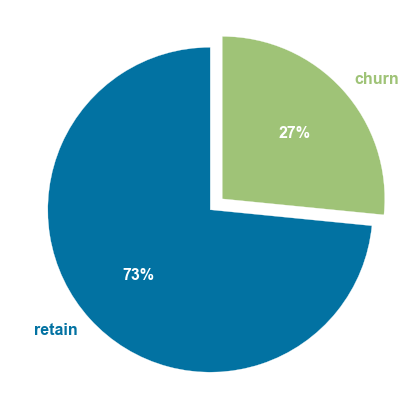

In [4]:
visuals_telco.viz1()

#### Takeaways:
- Churn represents roughly 27% of overall customers, since new customer acquisitions represents substantial costs, finding drivers of churn is crucial to improving the bottom line.
- Since churn is significant, finding churn probability and using preliminary findings to guide further analysis before modeling will be the approach taken.

<hr style="border-top: 10px groove lightsteelblue; margin-top: 1px; margin-bottom: 1px"></hr>

### Drivers of Churn

In [5]:
visuals_telco.viz2()

,attribute,churn,retain
0,Payment Type (Electronic check),0.450737,0.549263
1,Contract Type (Month-to-month),0.428176,0.571824
2,Internet Service Type (Fiber optic),0.426829,0.573171
3,Senior Citizen (Yes),0.426772,0.573228
4,Paperless Billing (Yes),0.335628,0.664372
5,Partner (No),0.327084,0.672916
6,Online Security (No),0.317056,0.682944
7,Dependents (No),0.313297,0.686703
8,Tech Support (No),0.310579,0.689421
9,Streaming Movies (Yes),0.293965,0.706035


#### Takeaways:
- Excluding the month-to-month contract type, the top five predictions of churn are:
   - Payment Type (Electronic Check)
   - Internet Service Type (Fiber Optic)
   - Senior Citizen (Yes)
   - Paperless Billing (Yes)
   - Partner (No)

<hr style="border-top: 10px groove lightsteelblue; margin-top: 1px; margin-bottom: 1px"></hr>

### Okay...boomer?

$Chi^{2}$ Hypothesis

$\alpha$ = .05

$𝐻_{0}$: Seniority and contract types are independent.

$𝐻_{𝑎}$: Seniority and contract types are not independent.

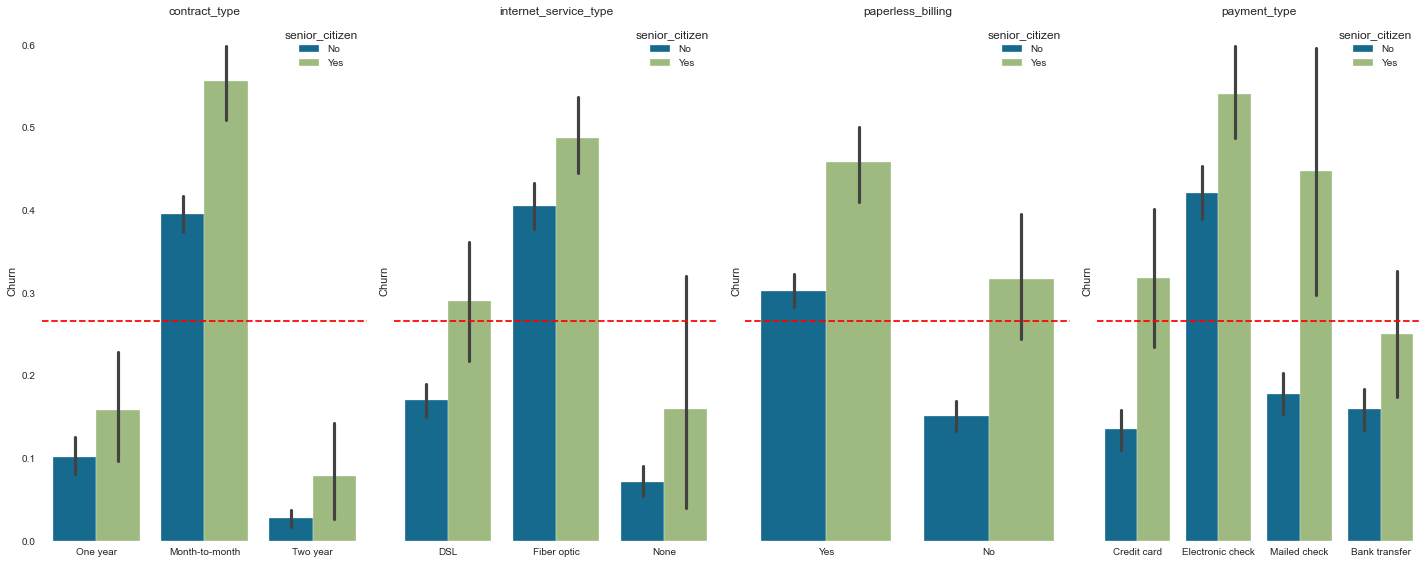

In [6]:
visuals_telco.viz3()

In [7]:
visuals_telco.stats1()

P-value: 0.000
Reject the null hypothesis.


$Chi^{2}$ Hypothesis

$\alpha$ = .05

$𝐻_{0}$: Seniority and payment types are independent.

$𝐻_{𝑎}$: Seniority and payment types are not independent.

In [8]:
visuals_telco.stats2()

P-value: 0.000
Reject the null hypothesis.


#### Takeaways
- Statistical testing confirms that there is sufficient evidence to reject the null hypotheses.
- Visually, senior citizens represent the highest groups in the most churnable categories.

<hr style="border-top: 10px groove lightsteelblue; margin-top: 1px; margin-bottom: 1px"></hr>

### Dinner for One...again?

$Chi^{2}$ Hypothesis

$\alpha$ = .05

$𝐻_{0}$: Having a partner and internet service types are independent.

$𝐻_{𝑎}$: Having a partner and internet service types are not independent.

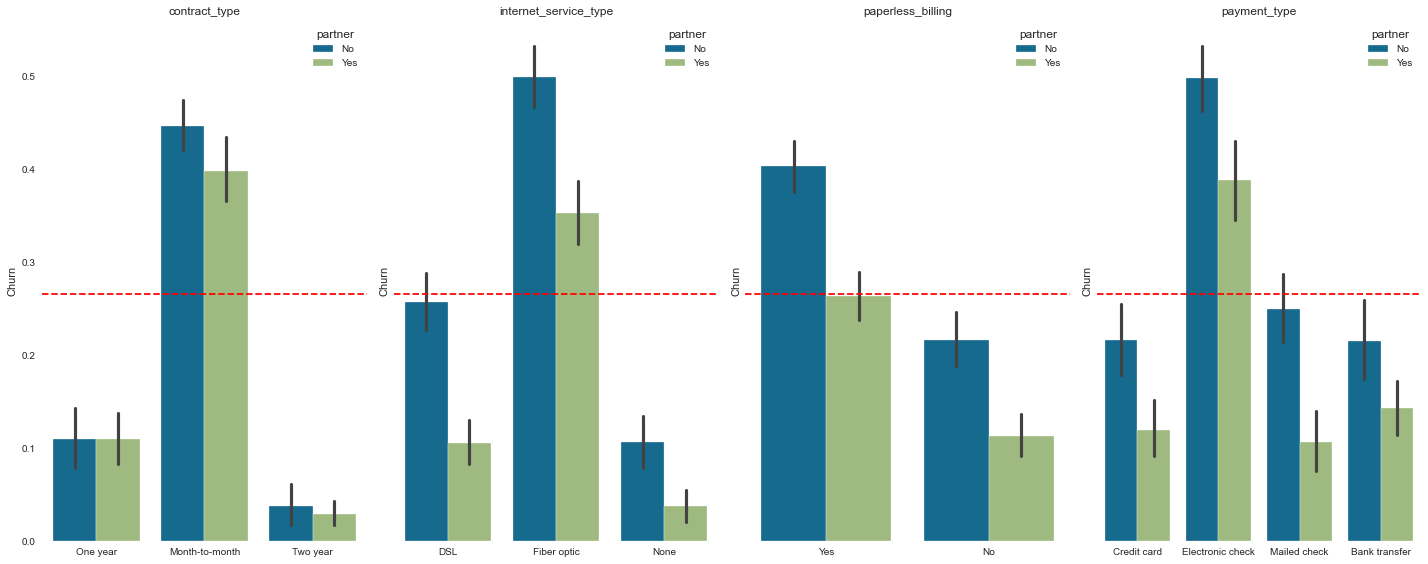

In [9]:
visuals_telco.viz4()

In [10]:
visuals_telco.stats3()

P-value: 0.505
Fail to reject the null hypothesis.


#### Takeaways:
- Visually, those without partners churn most frequently, most noticeably for those with fiber optic internet service. 
- Testing based on internet type may provide further statistical insights.

<hr style="border-top: 5px groove blanchedalmond; margin-top: 1px; margin-bottom: 1px"></hr>

$Chi^{2}$ Hypothesis

$\alpha$ = .05

$𝐻_{0}$: Having a partner and fiber optic internet service are independent.

$𝐻_{𝑎}$: Having a partner and fiber optic internet service are not independent.

In [11]:
visuals_telco.stats4()

P-value: 0.437
Fail to reject the null hypothesis.


#### Takeaways:
- Even after eliminating the other internet categories, the statistical metric produced the same result, there is not enough confidence based on the threshold set to conclude that partnership status and fiber-optic internet service are independent of one another.

<hr style="border-top: 5px groove blanchedalmond; margin-top: 1px; margin-bottom: 1px"></hr>

#### A Deeper Look at Seniors and Singles

#### Questions:
- What is the probability of senior churn and are certain factors primarily responsible?

- What is the probability of unpartnered churn and are there certain factors that are the primary indications of churn?

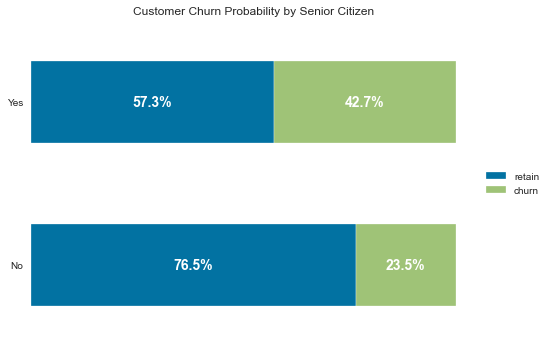

In [12]:
visuals_telco.viz5()

#### Takeaways:
- The graph above highlights that senior citizens churn about 20% more often than non-seniors.
- While they represent a roughly 16% of the dataset, overall population trends suggests that they are a growing demographic and their churn rate relative to the population of Telco customers cannot be ignored.

In [13]:
#do senior citizens have a higher than average bill compared to non-seniors?

df_s_mc = pd.DataFrame(round(train.groupby('senior_citizen')['monthly_charges'].mean(),2)) #yes, on avg pay approximately $19 more per month
df_s_mc

,monthly_charges
senior_citizen,
No,61.83
Yes,80.30


#### Takeaways:
- Seniors have a higher than average monthly bill compared to their younger counterparts.

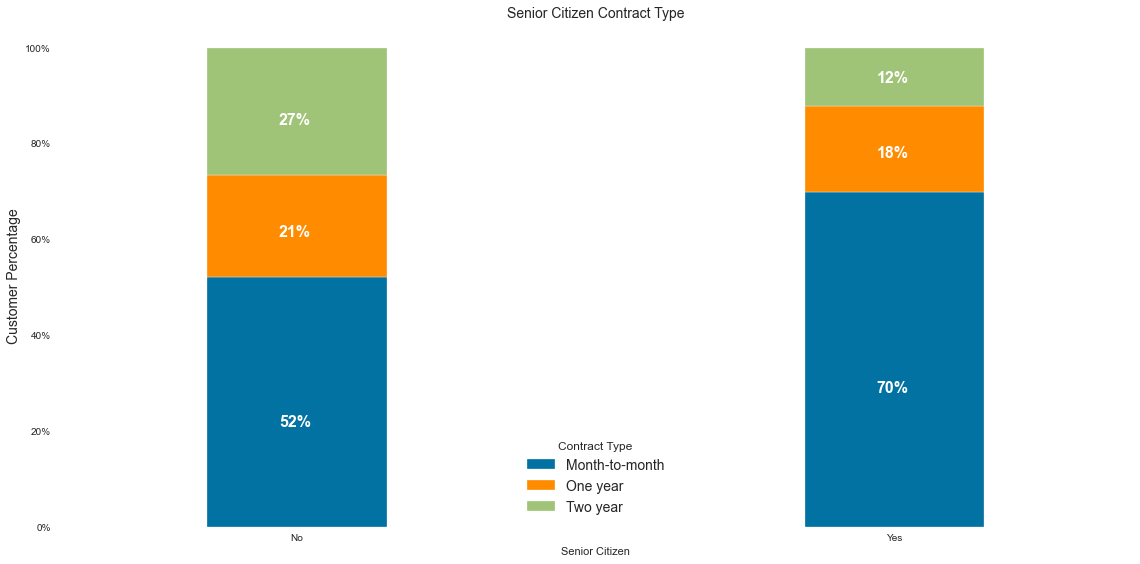

In [14]:
visuals_telco.viz6()

#### Takeaways:
- Seniors are overwhelmingly fond of our frothiest plan, month-to-month more often than not and at a higher rate than their non-senior counterparts.

<hr style="border-top: 5px groove blanchedalmond; margin-top: 1px; margin-bottom: 1px"></hr>

In [15]:
df_t = pd.DataFrame(train.groupby('senior_citizen')['payment_type'].value_counts())
                   
df_t

payment_type
senior_citizen payment_type                  
No             Electronic check           965
               Mailed check               844
               Credit card                763
               Bank transfer              730
Yes            Electronic check           324
               Bank transfer              132
               Credit card                132
               Mailed check                47

#### Takeaways:
- Although both non-seniors and seniors pay most often with electronic check, electronic check is disproportionately favored by seniors.
- Electronic checks represent approximately 52% of payment types by seniors.

<hr style="border-top: 5px groove blanchedalmond; margin-top: 1px; margin-bottom: 1px"></hr>

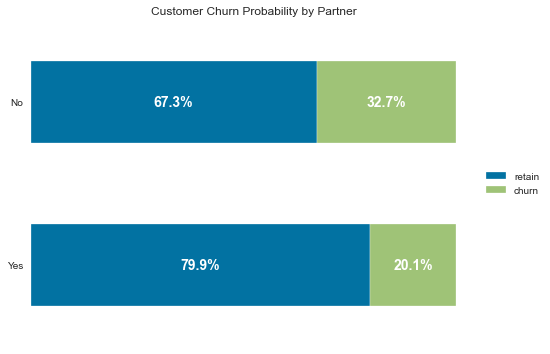

In [16]:
visuals_telco.viz7()

#### Takeaways: 
- Non-partnered people churn at a higher rate than customers with partners.
- Non-partnered people represent about 51% of this dataset, so higher churn rates in this group has significance.

In [17]:
#do people with partners have higher monthly charges?

df_p_mc = pd.DataFrame(round(train.groupby('partner')['monthly_charges'].mean(),2))
df_p_mc

,monthly_charges
partner,
No,61.37
Yes,68.46


#### Takeaways:
- It pays to be single sometimes, those in relationships pay more than their partnered counterparts.

In [18]:
df_t_p = pd.DataFrame(train.groupby('partner')['payment_type'].value_counts())
                   
df_t_p

payment_type
partner payment_type                  
No      Electronic check           738
        Mailed check               533
        Credit card                393
        Bank transfer              363
Yes     Electronic check           551
        Credit card                502
        Bank transfer              499
        Mailed check               358

#### Takeaways:
- Electronic check is used most often in both those with partners and those without partners, but is disproportionately favored by those flying solo.

#### Churn Probability 

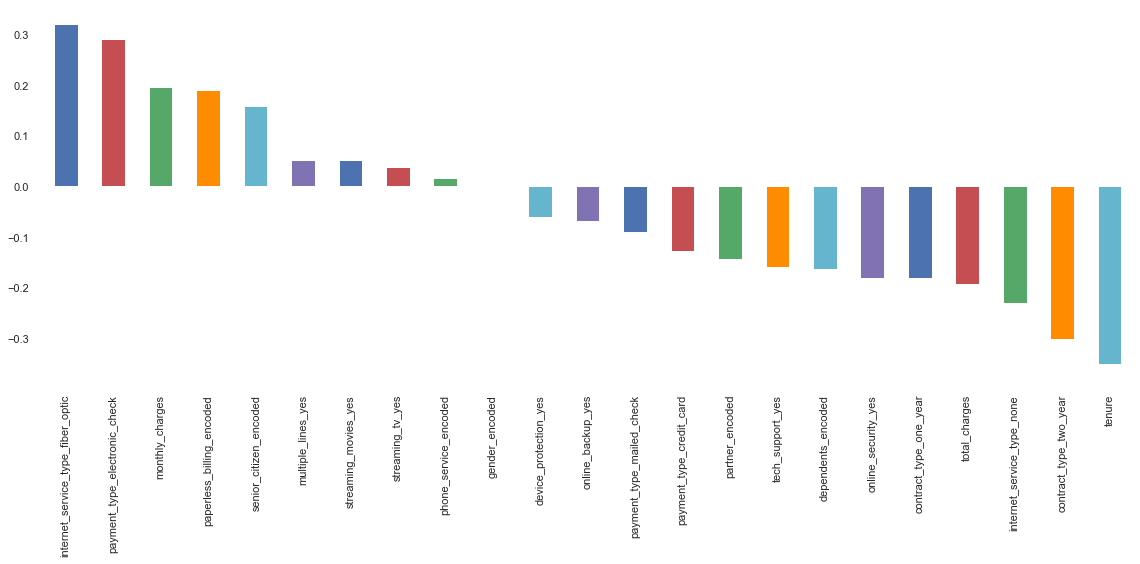

In [19]:
visuals_telco.viz8()

#### Takeaways:
- The top positive predictors of churn are:
    - Fiber optic internet service
    - Electronic check payment type
    - Monthly charges
    - Paperless billing
    - Seniority
    

<h1 style= "border-bottom: 10px groove lightsteelblue; margin-top: 1px; margin-bottom: 1px"> Modeling</h1>

In [21]:
 X_train, y_train, X_validate, y_validate, X_test, y_test = visuals_telco.modeling_vars(train, validate, test)

#### Some notes:
- Since the accurate prediction of churn (1) is the focus of today's meeting, churn is the positive case.
- To that end, accuracy and recall will be the performance metrics used.

### Establish a Baseline

In [22]:
# since most customers in this dataset did not churn, use mode as baseline
baseline = y_train.mode()

#boolean array
baseline_prediction = y_train == 0

baseline_accuracy = baseline_prediction.mean()
print(f'Baseline Accuracy: {baseline_accuracy:.2f}') 

Baseline Accuracy: 0.73


<h4 style="border-bottom: 5px groove blanchedalmond; margin-top: 1px; margin-bottom: 1px">Decision Tree</h4>

In [23]:
visuals_telco.dt(X_train, y_train)

Accuracy of Decision Tree Classifier on training set: 0.81
Classification report, Train:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,0,1,accuracy,macro avg,weighted avg
precision,0.827745,0.708455,0.80696,0.768100,0.796052
recall,0.930820,0.464627,0.80696,0.697723,0.806960
f1-score,0.876262,0.561201,0.80696,0.718731,0.792555
support,2891.000000,1046.000000,0.80696,3937.000000,3937.000000


<hr style="border-top: 5px groove blanchedalmond; margin-top: 1px; margin-bottom: 1px"></hr>

In [24]:
visuals_telco.dt_confusion()

Confusion Matrix:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,Pred. Retained,Pred. Churned
Actually Retained,2691,200
Actually Churned,560,486


<h4 style="border-bottom: 5px groove blanchedalmond; margin-top: 1px; margin-bottom: 1px">Random Forest</h4>

In [25]:
visuals_telco.random_forest(X_train, y_train)

Accuracy of Random Forest Classifier on training set: 0.80
Classification report, Train:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,0,1,accuracy,macro avg,weighted avg
precision,0.816821,0.728188,0.803404,0.772505,0.793273
recall,0.943964,0.414914,0.803404,0.679439,0.803404
f1-score,0.875802,0.528624,0.803404,0.702213,0.783562
support,2891.000000,1046.000000,0.803404,3937.000000,3937.000000


<hr style="border-top: 5px groove blanchedalmond; margin-top: 1px; margin-bottom: 1px"></hr>

In [26]:
visuals_telco.rf_confusion()

Confusion Matrix:
~~~~~~~~~~~~~~~~~~~~~~


,Pred. Retained,Pred. Churned
Actually Retained,2729,162
Actually Churned,612,434


<h4 style="border-bottom: 5px groove blanchedalmond; margin-top: 1px; margin-bottom: 1px">K Nearest Neighbors</h4>

In [27]:
visuals_telco.knn(X_train, y_train)

Accuracy of K Nearest Neighbors Classifier on training set: 0.81
Classification report, Train:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,0,1,accuracy,macro avg,weighted avg
precision,0.817616,0.762832,0.809754,0.790224,0.803060
recall,0.953649,0.412046,0.809754,0.682848,0.809754
f1-score,0.880409,0.535071,0.809754,0.707740,0.788658
support,2891.000000,1046.000000,0.809754,3937.000000,3937.000000


<hr style="border-top: 5px groove blanchedalmond; margin-top: 1px; margin-bottom: 1px"></hr>

In [28]:
visuals_telco.knn_confusion()

Confusion Matrix:
~~~~~~~~~~~~~~~~~~~~~~


,Pred. Retained,Pred. Churned
Actually Retained,2757,134
Actually Churned,615,431


<h4 style="border-bottom: 5px groove blanchedalmond; margin-top: 1px; margin-bottom: 1px">Logistic Regression</h4>

In [29]:
visuals_telco.lr(X_train, y_train)

Logistic Regression using fiber optic internet service, e-check, and tenure as features
Accuracy of Logistic Regression on training set: 0.80
Classification report, Train:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,0,1,accuracy,macro avg,weighted avg
precision,0.825288,0.668044,0.796292,0.746666,0.783511
recall,0.916638,0.463671,0.796292,0.690154,0.796292
f1-score,0.868568,0.547404,0.796292,0.707986,0.783239
support,2891.000000,1046.000000,0.796292,3937.000000,3937.000000


<hr style="border-top: 5px groove blanchedalmond; margin-top: 1px; margin-bottom: 1px"></hr>

In [30]:
visuals_telco.lr_confusion()

Confusion Matrix:
~~~~~~~~~~~~~~~~~~~~~~


,Pred. Retained,Pred. Churned
Actually Retained,2650,241
Actually Churned,561,485


#### Takeaways:
- The models provided similar improvement from the baseline in accuracy
- Recall was a more challenging metric to improve, with Decision Tree and Logistic Regression showing the best metrics

<h1 style="border-bottom: 10px groove lightsteelblue; margin-top: 1px; margin-bottom: 1px">Model Evaluation (Validate)</h1>

<h4 style="border-bottom: 5px groove blanchedalmond; margin-top: 1px; margin-bottom: 1px">Decision Tree</h4>

In [31]:
visuals_telco.dt_v()

Accuracy of Decision Tree Classifier on validation set: 0.7953
Classification report, Validate:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,0,1,accuracy,macro avg,weighted avg
precision,0.825897,0.662879,0.795309,0.744388,0.782564
recall,0.913843,0.467914,0.795309,0.690879,0.795309
f1-score,0.867647,0.548589,0.795309,0.708118,0.782837
support,1033.000000,374.000000,0.795309,1407.000000,1407.000000


<h4 style="border-bottom: 5px groove blanchedalmond; margin-top: 1px; margin-bottom: 1px">Random Forest</h4>

In [32]:
visuals_telco.rf_v()

Accuracy of Random Forest Classifier on validation set: 0.7996
Classification report, Validate:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,0,1,accuracy,macro avg,weighted avg
precision,0.820666,0.694915,0.799574,0.757791,0.787240
recall,0.930300,0.438503,0.799574,0.684401,0.799574
f1-score,0.872051,0.537705,0.799574,0.704878,0.783177
support,1033.000000,374.000000,0.799574,1407.000000,1407.000000


<h4 style="border-bottom: 5px groove blanchedalmond; margin-top: 1px; margin-bottom: 1px">K Nearest Neighbors</h4>

In [33]:
visuals_telco.knn_v()

Accuracy of K Nearest Neighbors Classifier on validation set: 0.7846
Classification report, Validate:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,0,1,accuracy,macro avg,weighted avg
precision,0.805184,0.668246,0.784648,0.736715,0.768784
recall,0.932236,0.377005,0.784648,0.654621,0.784648
f1-score,0.864065,0.482051,0.784648,0.673058,0.762520
support,1033.000000,374.000000,0.784648,1407.000000,1407.000000


<h4 style="border-bottom: 5px groove blanchedalmond; margin-top: 1px; margin-bottom: 1px">Logistic Regression</h4>

In [34]:
visuals_telco.lr_v()

Accuracy of Logistic Regression classifier on validation set: 0.7989
Classification report, Validate:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,0,1,accuracy,macro avg,weighted avg
precision,0.835420,0.657439,0.798863,0.746430,0.788111
recall,0.904163,0.508021,0.798863,0.706092,0.798863
f1-score,0.868433,0.573152,0.798863,0.720793,0.789944
support,1033.000000,374.000000,0.798863,1407.000000,1407.000000


<h3 style="border-bottom: 5px groove blanchedalmond; margin-top: 1px; margin-bottom: 1px">Visualization on Validate</h3>

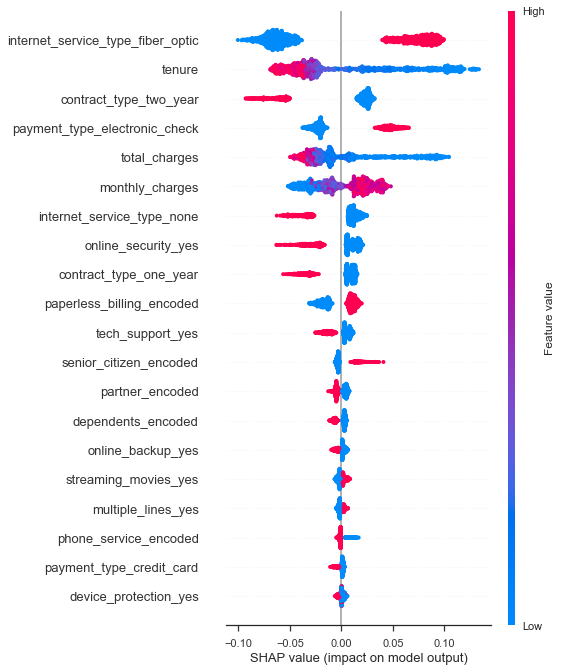

In [35]:
visuals_telco.viz_validate()

#### Takeaways

- After modeling, the factors examined in this project were also the most helpful in predicting churn.

<h3 style="border-bottom: 5px groove blanchedalmond; margin-top: 1px; margin-bottom: 1px">Model Test Performance: Logistic Regression</h3>

In [36]:
visuals_telco.lr_test()

Accuracy of Logistic Regression classifier on test set: 0.7767
Classification report, Validate:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,0,1,accuracy,macro avg,weighted avg
precision,0.823088,0.601695,0.776659,0.712392,0.764199
recall,0.886199,0.474388,0.776659,0.680293,0.776659
f1-score,0.853478,0.530511,0.776659,0.691995,0.767571
support,1239.000000,449.000000,0.776659,1688.000000,1688.000000


#### Takeaways:

- Logistic Regression gave an improvement of approximately 4.67% above baseline accuracy and had the highest recall on the positive case.

<h4 style="border-bottom: 5px groove blanchedalmond; margin-top: 1px; margin-bottom: 1px">Visualization on Test</h4>

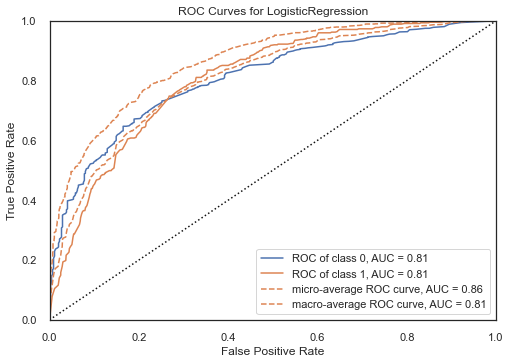

In [37]:
visuals_telco.viz_auc()

#### Predictions.csv

In [38]:
visuals_telco.get_predictions_csv()

,predictions,churn_probability
0,0,0.392487
1,0,0.017570
2,0,0.096189
3,0,0.106854
4,0,0.025703
...,...,...
1683,0,0.124696
1684,0,0.206859
1685,0,0.084661
1686,0,0.254635


<h1 style="border-bottom:10px groove lightsteelblue; margin-top: 1px; margin-bottom: 1px">Recommendations</h1>

- Since credit card type and bank transfer are automatic processes, have Customer Service Representatives recommend switching to automatic plans.
- Develop a point system that rewards Month to Month customers for consecutive months such as a small discount after three months.
- Develop tiers for fiber optic internet service.
- Set up text reminders for upcoming bills and auto-pay options to all customers since paperless billing may be attributed to forgetting to pay bills on-time.
- Develop shorter-term contracts and incentivize contract renewal.

<h1 style="border-bottom: 10px groove maroon; margin-top: 1px; margin-bottom: 1px">Conclusion and Next Steps</h1>

- Demographically, churn has many factors including tenure, monthly charges, seniority, some internet services and e-check.
- Feature engineering in future iterations, such as grouping internet services to see if that produces a more accurate model is something planned for future iteations of this project.
- Some questions to address include finding the reasons for higher than average monthly charges and price sensitivity threshold for seniors. 
- I look forward to continue to build models to see if accuracy can be improved.